Assignment 3 Decision Tree Classification and Evaluation

Tyler Gardner

September 7th 2021


# Task 1


In [39]:
# Import the packages needed (Pandas, mount google drive, seaborn)

# Import Pandas
import pandas as pd

# Import Seaborn
import seaborn as sns

# Import Numpy
import numpy as np

# Import sklearn
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Import matplotlib
import matplotlib.pyplot as plt


In [40]:
# mount the google drive location so we can read the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Code chunk 1 contains set up, data import, and inspection code to import the data from the csv file containing the data, examine the overall structure of the input data using the info and describe functions and checking the data for any null values. This is done by reading in the data using the pd.read function. After doing that, to get the information to check the data the describe, info, df.isnull().sum() and head functions are used.

## 1. Code Chunk 1 

In [41]:
# A. Set up, data import and inspection code

# Import data using pd.read_csv()
CD_additional_balanced_raw = pd.read_csv("/content/drive/MyDrive/data_sets/CD_additional_balanced.csv")
CD_additional_balanced = CD_additional_balanced_raw.copy()

# raw is the original unedited version of our data which can be useful for inspecting changes we've made 
# compared to the original unedited data

In [42]:
# Examine the overall structure of the input data using fucntions
CD_additional_balanced.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,9280.000000,9280,9280,9280,9280,9280,9280,9280,9280,9280,9280.000000,9280.000000,9280.000000,9280.000000,9280,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280
unique,NaN,12,4,8,2,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,2517,5338,3007,7824,4951,7688,6672,2533,2000,NaN,NaN,NaN,NaN,7244,NaN,NaN,NaN,NaN,NaN,4640
mean,40.403448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.361746,2.333297,887.282435,0.315302,NaN,-0.496272,93.479178,-40.218125,2.960209,5135.306487,NaN
std,12.062030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357.711742,2.334467,313.802415,0.700671,NaN,1.721204,0.634510,5.360642,1.890402,87.105317,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000000,1.000000,999.000000,0.000000,NaN,-1.800000,92.893000,-42.700000,1.244000,5076.200000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.000000,2.000000,999.000000,0.000000,NaN,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.959000,5228.100000,NaN


In [43]:
CD_additional_balanced.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   int64  
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   int64  
 11  campaign        9280 non-null   int64  
 12  pdays           9280 non-null   int64  
 13  previous        9280 non-null   int64  
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

In [44]:
CD_additional_balanced.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
3,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [45]:
# Check for nulls with df.isnull().sum()
CD_additional_balanced.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Task 2


This code chunk is focused on gathering the count and percentage of instances belonging to each class of the target variable "y". The code chunk gives us the count and percentage of the data of yes and no's to whether the client has subscribed to a certified term deposit.

## 2. Code Chunk 2 


In [46]:
CD_additional_balanced.y.value_counts()

no     4640
yes    4640
Name: y, dtype: int64

In [47]:
round(CD_additional_balanced.y.value_counts() / len(CD_additional_balanced),2)

no     0.5
yes    0.5
Name: y, dtype: float64

In a comment describe the distribution of the target variable. Is it balanced or imbalanced?

The distribition of the target variable is balanced being that the results are 50% of the clients being subscribed to a certified term deposit and 50% of the clients not being subscribed to a certified term deposit. 

# Task 3

Code chunk 3 is very crucial. This section of code is preparing the data so we are able to train and test and create our models from it. In this section I have also added the steps in the table of contents because I do them out of order. I went ahead and changed the categorical features to category data types first. I then used the get_dummies to transofrm my dataframe to a one-hot encoded dataframe but before doing that I did use the pop function to extract the target column first. After encoding it I went on to step E and checked out the data frame using the head() function to be sure that it was encoded successfully. I then proceded to steps A and B. For step A I partitioned the encoded data for a simple hold-out classification and then used the describe(include='all') to print out the test and train sets. For step B in this code chunk it shows the distributions (counts/percentages) of 'y' the target variable in the train and test set.

## 3. Code Chunk 3

In [48]:
# random state
# set random state for all models for reproducbility
# if this is NOT set then you will see variations each time you run the model
# for this reason reproducibility is desirable in homeworks
random_state = 42

### C.

In [49]:
# C
# Convert categorical features to categorical. Check the conversion with dtypes
CD_additional_balanced = CD_additional_balanced.astype({'job': 'category',
                                                         'marital': 'category',
                                                        'education': 'category',
                                                        'default': 'category',
                                                        'housing': 'category',
                                                        'loan': 'category',
                                                        'contact': 'category',
                                                        'month': 'category',
                                                        'day_of_week': 'category',
                                                        'poutcome': 'category',
                                                        'y': 'category' })

CD_additional_balanced.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

### D.

In [50]:
# D
# Transform your dataframe to a one-hot encoded dataframe using get_dummies.
# extract the target column of 'y'
y_target = CD_additional_balanced.pop('y')

# use pandas get_dummies to one-hot-encode categorical values
# we would expect only numeric values left in our dataframe
# rename this df as encoded so we understand it's the encoded version
# of the original
CD_additional_balanced_encoded_X = pd.get_dummies(CD_additional_balanced)

### E.

In [51]:
# E
# Check out dataframe using head() to be sure that the one-hot encoding
# has been successful
CD_additional_balanced_encoded_X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,41,1575,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,49,1042,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,49,1467,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,41,579,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,45,461,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


### A.

In [52]:
# A
# split the dataset into two main groups
# train will be used for training the model
# test will be used for evaluation of the mode
X_train, X_test, y_train, y_test = train_test_split(CD_additional_balanced_encoded_X,
                                                    y_target, 
                                                    test_size=.3, 
                                                    random_state=random_state,
                                                    stratify=y_target)


In [53]:
X_train.describe(include='all')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000
mean,40.416410,386.637315,2.323584,889.692888,0.309883,-0.493719,93.477802,-40.184729,2.965054,5135.575062,0.263547,0.190117,0.032482,0.025246,0.074046,0.064039,0.031866,0.082204,0.039563,0.162100,0.026632,0.008159,0.108990,0.575585,0.313116,0.002309,0.097291,0.051724,0.127617,0.221367,0.000616,0.129926,0.324661,0.046798,0.841595,0.158405,0.447198,0.024015,0.528787,0.826201,0.024015,0.149784,0.718288,0.281712,0.084052,0.145782,0.010468,0.158405,0.126078,0.036330,0.272629,0.097906,0.037408,0.030942,0.191810,0.199661,0.210899,0.194889,0.202740,0.115917,0.783097,0.100985
std,12.031077,358.601105,2.314789,310.837649,0.692332,1.718916,0.632995,5.329726,1.890999,86.902904,0.440590,0.392424,0.177289,0.156884,0.261865,0.244842,0.175656,0.274697,0.194945,0.368571,0.161017,0.089964,0.311651,0.494292,0.463797,0.048001,0.296376,0.221487,0.333689,0.415199,0.024809,0.336248,0.468284,0.211222,0.365149,0.365149,0.497242,0.153107,0.499209,0.378966,0.153107,0.356888,0.449868,0.449868,0.277487,0.352915,0.101784,0.365149,0.331962,0.187124,0.445346,0.297211,0.189773,0.173174,0.393755,0.399777,0.407978,0.396146,0.402071,0.320151,0.412168,0.301332
min,17.000000,1.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,145.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,263.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,

In [54]:
X_test.describe(include='all')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
mean,40.373204,389.052083,2.355963,881.658046,0.327945,-0.502227,93.482387,-40.296049,2.948903,5134.679813,0.289152,0.191810,0.034842,0.018678,0.061063,0.064296,0.035560,0.085848,0.036279,0.145833,0.026940,0.009698,0.112428,0.574353,0.311063,0.002155,0.094468,0.043822,0.125000,0.238506,0.000718,0.124282,0.322557,0.050647,0.846624,0.153376,0.430675,0.024784,0.544540,0.833693,0.024784,0.141523,0.720546,0.279454,0.085848,0.145833,0.011494,0.160920,0.125718,0.027658,0.273707,0.089799,0.045259,0.033764,0.185704,0.197198,0.226293,0.195402,0.195402,0.115302,0.774784,0.109914
std,12.136060,355.686381,2.380016,320.599666,0.719720,1.726824,0.638132,5.432260,1.889299,87.588252,0.453450,0.393795,0.183412,0.135410,0.239489,0.245324,0.185225,0.280189,0.187016,0.353002,0.161936,0.098019,0.315949,0.494529,0.463012,0.046382,0.292532,0.204735,0.330778,0.426246,0.026798,0.329962,0.467539,0.219314,0.360415,0.360415,0.495260,0.155496,0.498102,0.372423,0.155496,0.348623,0.448812,0.448812,0.280189,0.353002,0.106612,0.367523,0.331591,0.164021,0.445940,0.285945,0.207908,0.180655,0.388937,0.397955,0.418506,0.396581,0.396581,0.319443,0.417799,0.312838
min,17.000000,4.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,146.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-45.900000,1.244000,5076.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,269.000000,2.000000,999.000000,0.000000,-1.100000,93.444000,-41.800000,

### B.

In [55]:
# B
# Show the distributioins of y in the train set and in the test set.
y_train.value_counts()

yes    3248
no     3248
Name: y, dtype: int64

In [56]:
y_test.value_counts()

yes    1392
no     1392
Name: y, dtype: int64

In [57]:
print(y_train.value_counts())
print(round(y_train.value_counts(normalize=True),2))

yes    3248
no     3248
Name: y, dtype: int64
yes    0.5
no     0.5
Name: y, dtype: float64


In [58]:
print(y_test.value_counts())
print(round(y_test.value_counts(normalize=True),2))

yes    1392
no     1392
Name: y, dtype: int64
yes    0.5
no     0.5
Name: y, dtype: float64


# Task 4

Code chunk 4 contains the code to create our first sklearn tree model. The first step in this code was to fit tree_model_1 to classify y with all other variables as predictors. After fitting it the code checks to make sure it is fitted correctly and then shows the model and the summary of the model. The next step of this code was to use the predict function to compare this model's confusion matrices and classification evaluation metrics in the test and train sets.

## 4. Code Chunk 4

In [75]:
# A
# Fit a sklearn tree model setting to classify y with all other
# variables as predictors. Show this model and the summary of the model.
# Do not plot the tree at this point
tree_model_1 = tree.DecisionTreeClassifier(random_state=random_state)
tree_model_1

tree_model_1 = tree_model_1.fit(X_train,y_train)

# Check to see if the model is fitted.
sklearn.utils.validation.check_is_fitted(tree_model_1)
# note that you only get an output if the model is not fitted.

#Show the model and the summary of the model
print(tree.export_text(tree_model_1, feature_names=X_train.columns.to_list()))

|--- duration <= 206.50
|   |--- nr.employed <= 5087.65
|   |   |--- duration <= 124.50
|   |   |   |--- duration <= 80.00
|   |   |   |   |--- poutcome_success <= 0.50
|   |   |   |   |   |--- duration <= 77.50
|   |   |   |   |   |   |--- month_nov <= 0.50
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |--- month_nov >  0.50
|   |   |   |   |   |   |   |--- euribor3m <= 0.71
|   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |--- euribor3m >  0.71
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- duration >  77.50
|   |   |   |   |   |   |--- housing_no <= 0.50
|   |   |   |   |   |   |   |--- day_of_week_fri <= 0.50
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |--- day_of_week_fri >  0.50
|   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |--- housing_no >  0.50
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |--- poutcome_success >  0.50
|   |   |   |   |

In [76]:
# B
# Predict Using the predict funciton, sklearn confusion_matrix and metrics.
# classification_report to generate and compare this models confusion matrices
# and classification evaluation metrics in the test and train sets.
# Test Set
print(metrics.classification_report(y_test,tree_model_1.predict(X_test)))
print(metrics.confusion_matrix(y_test,tree_model_1.predict(X_test)))

              precision    recall  f1-score   support

          no       0.82      0.83      0.82      1392
         yes       0.83      0.82      0.82      1392

    accuracy                           0.82      2784
   macro avg       0.82      0.82      0.82      2784
weighted avg       0.82      0.82      0.82      2784

[[1152  240]
 [ 254 1138]]


In [77]:
# Train Set
print(metrics.classification_report(y_train,tree_model_1.predict(X_train)))
print(metrics.confusion_matrix(y_train,tree_model_1.predict(X_train)))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      3248
         yes       1.00      1.00      1.00      3248

    accuracy                           1.00      6496
   macro avg       1.00      1.00      1.00      6496
weighted avg       1.00      1.00      1.00      6496

[[3248    0]
 [   0 3248]]


# Task 5

Code chunk 5 creates our second model on the train and test decision tree to classify 'y'. Similar to code chunk 4, the first step to this code chunk was fit the tree_model_2 to a simplified version of decision tree 1 by adjusting the ccp_alpha of tree_model_1. This model also gets plotted in this code chunk.After adjusting the ccp_alpha and plotting the model, the code then uses the predict function to generate and compare this models confusion matrices and classification evaluation metrics in the test and train sets.

## 5. Code Chunk 5

In [62]:
# A 
# Fit a simplified version of Decision Tree 1 by adjusting the ccp_alpha
tree.DecisionTreeClassifier(random_state=random_state,max_leaf_nodes=11,ccp_alpha=.005)
tree_model_2 = tree.DecisionTreeClassifier(random_state=random_state,max_leaf_nodes=11,ccp_alpha=.01)

In [63]:
# Show this model and the summary of the the model.
tree_model_2 = tree_model_2.fit(X_train, y_train)
print(tree.export_text(tree_model_2, feature_names=X_train.columns.to_list()))

|--- duration <= 206.50
|   |--- nr.employed <= 5087.65
|   |   |--- class: yes
|   |--- nr.employed >  5087.65
|   |   |--- cons.conf.idx <= -46.65
|   |   |   |--- class: yes
|   |   |--- cons.conf.idx >  -46.65
|   |   |   |--- class: no
|--- duration >  206.50
|   |--- euribor3m <= 1.28
|   |   |--- class: yes
|   |--- euribor3m >  1.28
|   |   |--- duration <= 473.50
|   |   |   |--- cons.conf.idx <= -46.65
|   |   |   |   |--- class: yes
|   |   |   |--- cons.conf.idx >  -46.65
|   |   |   |   |--- class: no
|   |   |--- duration >  473.50
|   |   |   |--- class: yes



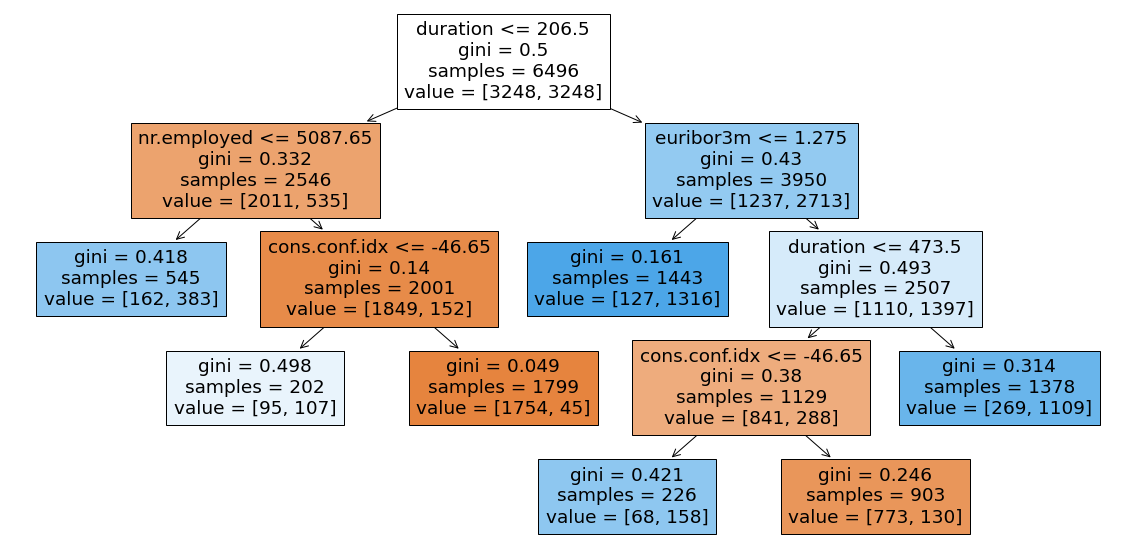

In [64]:
# Plot the tree since it is simpler
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(tree_model_2,
                   feature_names=X_train.columns.to_list(),
                   filled=True)

In [65]:
# B
# Predict using the predict function for test and train sets
# Test set
print(metrics.classification_report(y_test,tree_model_2.predict(X_test)))
print(metrics.confusion_matrix(y_test,tree_model_2.predict(X_test)))

              precision    recall  f1-score   support

          no       0.94      0.77      0.85      1392
         yes       0.81      0.95      0.87      1392

    accuracy                           0.86      2784
   macro avg       0.87      0.86      0.86      2784
weighted avg       0.87      0.86      0.86      2784

[[1076  316]
 [  74 1318]]


In [66]:
# Train set
print(metrics.classification_report(y_train,tree_model_2.predict(X_train)))
print(metrics.confusion_matrix(y_train,tree_model_2.predict(X_train)))

              precision    recall  f1-score   support

          no       0.94      0.78      0.85      3248
         yes       0.81      0.95      0.87      3248

    accuracy                           0.86      6496
   macro avg       0.87      0.86      0.86      6496
weighted avg       0.87      0.86      0.86      6496

[[2527  721]
 [ 175 3073]]


# Task 6

Code chunk 6 contains the code to create the train and test decision tree model 3 to predict 'y'. In this set of code the first step is to remove the variable 'duration' from the predictors before creating the model. After removing the 'duration' variable we continued to fit the model to classify 'y' with the remianing predictors for tree_model_3. After creating the tree_model_3 we showed the model and the summary of the model. Using the predict function, the models confusion matrices and classification evaluation metrics were generated and compared with the 'duration' predictor removed in the test and train sets.

## 6. Code Chunk 6

In [67]:
# A
# Remove the variable 'duration' from the predictors for decision tree 3.
X_train_no_duration = X_train.drop(list(X_train.filter(regex = 'duration')), axis=1, inplace=False)
X_test_no_duration = X_test.drop(list(X_test.filter(regex = 'duration')), axis=1, inplace=False)

In [68]:
# Fit a model to classify y with the remaining predictors of decision tree
tree_model_3 = tree.DecisionTreeClassifier(random_state=random_state,max_leaf_nodes=11)


tree_model_3 = tree_model_3.fit(X_train_no_duration, y_train)


#Show the model and the summary of the model
print(tree.export_text(tree_model_3, feature_names=X_train_no_duration.columns.to_list()))

|--- nr.employed <= 5087.65
|   |--- pdays <= 16.50
|   |   |--- class: yes
|   |--- pdays >  16.50
|   |   |--- class: yes
|--- nr.employed >  5087.65
|   |--- cons.conf.idx <= -46.65
|   |   |--- euribor3m <= 1.40
|   |   |   |--- class: yes
|   |   |--- euribor3m >  1.40
|   |   |   |--- euribor3m <= 1.53
|   |   |   |   |--- class: yes
|   |   |   |--- euribor3m >  1.53
|   |   |   |   |--- class: yes
|   |--- cons.conf.idx >  -46.65
|   |   |--- euribor3m <= 4.05
|   |   |   |--- pdays <= 11.50
|   |   |   |   |--- class: yes
|   |   |   |--- pdays >  11.50
|   |   |   |   |--- contact_telephone <= 0.50
|   |   |   |   |   |--- class: no
|   |   |   |   |--- contact_telephone >  0.50
|   |   |   |   |   |--- class: no
|   |   |--- euribor3m >  4.05
|   |   |   |--- month_oct <= 0.50
|   |   |   |   |--- contact_telephone <= 0.50
|   |   |   |   |   |--- class: no
|   |   |   |   |--- contact_telephone >  0.50
|   |   |   |   |   |--- class: no
|   |   |   |--- month_oct >  0.50
| 

In [69]:
# B
print(metrics.classification_report(y_test,tree_model_3.predict(X_test_no_duration)))
print(metrics.confusion_matrix(y_test,tree_model_3.predict(X_test_no_duration)))

              precision    recall  f1-score   support

          no       0.70      0.87      0.77      1392
         yes       0.83      0.62      0.71      1392

    accuracy                           0.75      2784
   macro avg       0.76      0.75      0.74      2784
weighted avg       0.76      0.75      0.74      2784

[[1209  183]
 [ 522  870]]


In [70]:
print(metrics.classification_report(y_train,tree_model_3.predict(X_train_no_duration)))
print(metrics.confusion_matrix(y_train,tree_model_3.predict(X_train_no_duration)))

              precision    recall  f1-score   support

          no       0.69      0.86      0.77      3248
         yes       0.82      0.62      0.70      3248

    accuracy                           0.74      6496
   macro avg       0.75      0.74      0.74      6496
weighted avg       0.75      0.74      0.74      6496

[[2803  445]
 [1250 1998]]


# Task 7

Code chunk 7 took the tree_model_3 that we made in code chunk 6 and fit a simplified version of the model by adjusting the ccp_alpha. The code after adjusting the ccp_alpha show the model and the summary of the model. The model is also plotted in this code chunk as well. The predict function is then used to compare and generate this models confusion matrices and classification evaluation metrics in the test and train sets.

## 7. Code Chunk 7

In [71]:
# A
# Fit a simplified version of Decision Tree 3 by adjusting the ccp_alpha
tree.DecisionTreeClassifier(random_state=random_state,max_leaf_nodes=11,ccp_alpha=.005)
tree_model_4 = tree.DecisionTreeClassifier(random_state=random_state,max_leaf_nodes=11,ccp_alpha=.01)

In [72]:
# Show this model and the summary of the model.
tree_model_4 = tree_model_4.fit(X_train_no_duration, y_train)
print(tree.export_text(tree_model_4, feature_names=X_train_no_duration.columns.to_list()))

|--- nr.employed <= 5087.65
|   |--- class: yes
|--- nr.employed >  5087.65
|   |--- cons.conf.idx <= -46.65
|   |   |--- class: yes
|   |--- cons.conf.idx >  -46.65
|   |   |--- class: no



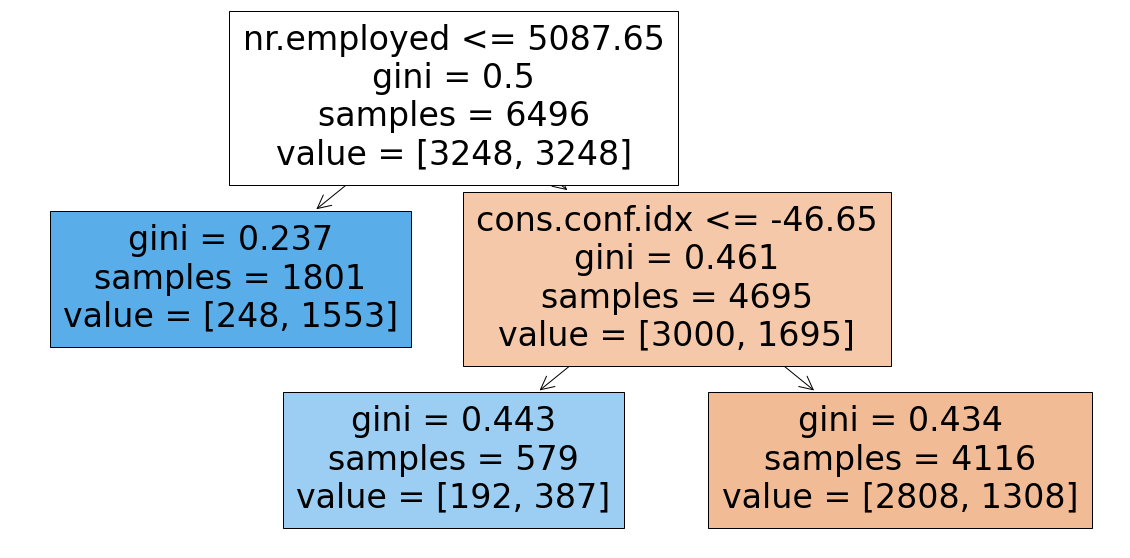

In [73]:
# Plot the tree
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(tree_model_4,
                   feature_names=X_train_no_duration.columns.to_list(),
                   filled=True)

# Task 8

In [74]:
# Render A3_Gardner_Tyler.ipynb to an HTML output file.  
!cp "/content/drive/MyDrive/Colab Notebooks/A3_Gardner_Tyler.ipynb" ./

!jupyter nbconvert --to html "A3_Gardner_Tyler.ipynb"

[NbConvertApp] Converting notebook A3_Gardner_Tyler.ipynb to html
[NbConvertApp] Writing 698034 bytes to A3_Gardner_Tyler.html
